In [1]:
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
input_shape= [224,224,3]
img_width= 224
img_height = 224

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
#useful for getting  a number of outputs
folder = glob('Datasets/train/*')
folder

['Datasets/train\\Shirt', 'Datasets/train\\Tshirt']

In [4]:
# Used to rescale the pixel value from [0,255] to [0,1] interval
datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# automatically retrive images and there classes fro train and validation sets
train_genrator = datagen.flow_from_directory(train_path,
                                            target_size=(img_width,img_height),
                                             batch_size=32,
                                             class_mode='binary')
test_genrator = datagen.flow_from_directory(valid_path,
                                            target_size= (img_width,img_height),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 794 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [6]:
## firts Convolution exatract 32 filters that are(3x3)
## Convolution is followed by Maxpooling layer with a windows (2x2)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer = 'he_uniform', padding = 'Same',input_shape=input_shape))
model.add(MaxPooling2D((2,2)))


## Second Convolutuon extract 64 filters that are (3x3)
## Convolution is followed by max-pooling layer with a windows (2x2)
model.add(Conv2D(64, (3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'Same'))
model.add(MaxPooling2D((2,2)))


## Third Convolution extract 128 filters that are(3x3)
## Convolutoon is followed by max-pooling layer with a windows( 2x2)
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

## Flaten layer amp to 1-dim tensor so we can add fully connected layers
model.add(Flatten())
 
## Create a fully connected layers with relu activation and 128 hidden layers
model.add(Dense(128,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))

## Create a output layers with two nodes and sigmoid activation 
model.add(Dense(1,activation = 'sigmoid'))


# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 128)       0

### Plotting our Model

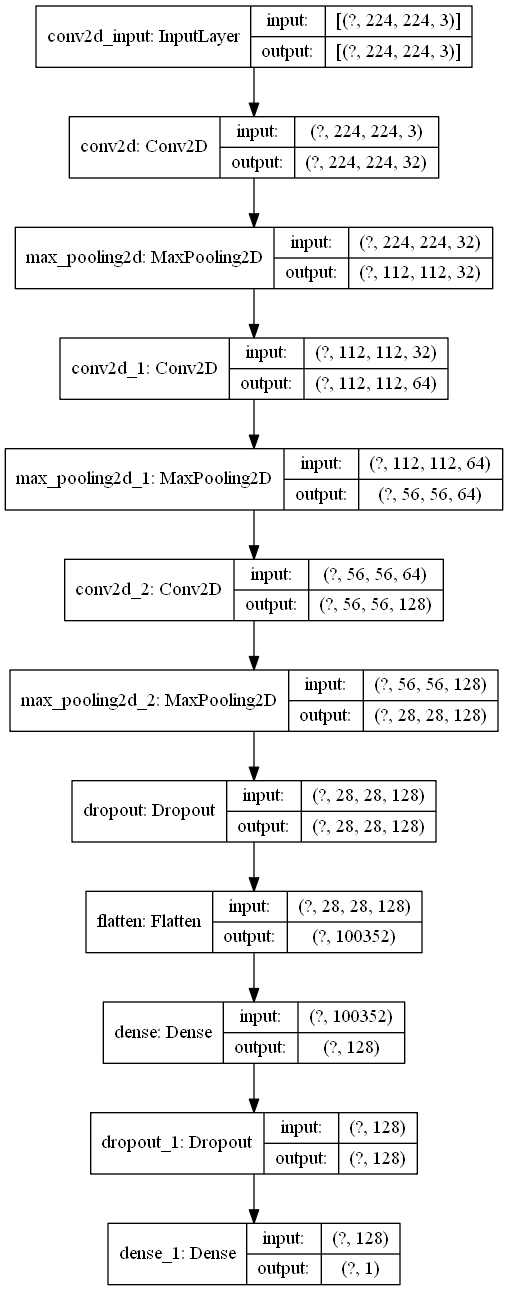

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=96,
)

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint =ModelCheckpoint(r"D:\Optimizer\Argumented_Checkpoint.h5",
                           monitor = "val_loss",
                           mode = "min",
                           save_best_only =True, 
                           verbose = 1)


earlystop =EarlyStopping(monitor = "val_loss",
                        min_delta = 0,
                        patience=4,
                        verbose=1,
                        baseline=None,
                        restore_best_weights=True)

                        
reduce_lr =ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             mode='auto',
                             min_delta=0.0001,
                             cooldown=0,
                            min_lr=0)   

callbacks = [checkpoint,earlystop,reduce_lr]  

### Time-Based Learning Rate Schedule 

In [9]:
from tensorflow.keras.optimizers import SGD 

# tell the model what cost and optimization method to use
epochs = 20
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer= 'SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              loss_weights=None,
              sample_weight_mode=None,
              weighted_metrics=None,
    
)

In [10]:
# Use the Image Data Generator to import the image from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255)            # normalize the pixel value to [0,1]
                                       

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 794 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 187 images belonging to 2 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  callbacks = callbacks,  
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 1.5242 - accuracy: 0.6763
Epoch 00001: val_loss improved from inf to 0.67141, saving model to D:\Optimizer\Argumented_Checkpoint.h5
25/25 [==============================] - 108s 4s/step - loss: 1.5242 - accuracy: 0.6763 - val_loss: 0.6714 - val_accuracy: 0.5134 - lr: 0.0100
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.7632
Epoch 00002: val_loss did not improve from 0.67141
25/25 [==============================] - 89s 4s/step - loss: 0.4971 - accuracy: 0.7632 - val_loss: 0.7470 - val_accuracy: 0.4920 - lr: 0.0100
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.4453 - accuracy: 0.7846
Epoch 00003: val_loss did not improve from 0.67141
25/25 [==============================] - 87s 3s/step - loss: 0.4453 - accuracy: 0.7846 - val_loss: 0.7241 - val_accuracy: 0.4920 - lr: 0.0100
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.4022 - accura

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

#Plot the loss
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs= range(1, len(loss_values) + 1)


line1 = plt.plot(epochs,val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs,loss_values, label = "Training Loss")
plt.setp(line1,linewidth = 2.0, marker = "+", markersize=10.0)
plt.setp(line1,linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid=(True)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='training_Accuracy')
plt.plot(history.history['val_accuracy'], label='validation_Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

In [ ]:
history.history

## Optimizer with RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint =ModelCheckpoint(r"D:\Optimizer\RMSprop_Checkpoint.h5",
                           monitor = "val_loss",
                           mode = "min",
                           save_best_only =True, 
                           verbose = 1)


earlystop =EarlyStopping(monitor = "val_loss",
                        min_delta = 0,
                        patience=4,
                        verbose=1,
                        baseline=None,
                        restore_best_weights=True)

                        
reduce_lr =ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             mode='auto',
                             min_delta=0.0001,
                             cooldown=0,
                            min_lr=0)   

callbacks = [checkpoint,earlystop,reduce_lr]  


In [ ]:


# tell the model what cost and optimization method to use
import keras
optimize = keras.optimizers.RMSprop (lr = 0.001)
model.compile(optimizer= optimize,
              loss='binary_crossentropy',
              metrics=['accuracy'],
              loss_weights=None,
              sample_weight_mode=None,
              weighted_metrics=None,
    
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history2 = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  callbacks = callbacks,  
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
import matplotlib.pyplot as plt

#Plot the loss
history_dict = history2.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs= range(1, len(loss_values) + 1)


line1 = plt.plot(epochs,val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs,loss_values, label = "Training Loss")
plt.setp(line1,linewidth = 2.0, marker = "+", markersize=10.0)
plt.setp(line1,linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid=(True)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
# plot the accuracy
plt.plot(history2.history['accuracy'], label='training_Accuracy')
plt.plot(history2.history['val_accuracy'], label='validation_Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

### Model with Adam Optimzer

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
checkpont = ModelCheckpoint(r"D:\Optimizer\Adam_Checkpoint.h5",
                           monitor = "val_loss",
                           mode = "min",
                           save_best_only =True, 
                           verbose = 1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=4,
                         verbose=1,
                          mode='auto',
                          baseline=None,
                         restore_best_weights=True,
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                             patience=3,
                             verbose=0,
                             mode='min',
                             min_delta=0.0001,
                            cooldown=0,
                            min_lr=0
)

callback = [checkpoint,earlystop,reduce_lr]  

In [ ]:
# tell the model what cost and optimization method to use
import keras
optimizers = Adam(learning_rate=0.01)
model.compile(optimizer=optimizers,
              loss='binary_crossentropy',
              metrics=['Accuracy'],
              loss_weights=None,
             sample_weight_mode=None,
             weighted_metrics=None
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute

history3 =model.fit(training_set,
  validation_data=test_set,
  epochs=20,
  callbacks = callback,  
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

In [ ]:
import matplotlib.pyplot as plt

#Plot the loss
history_dict = history2.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs= range(1, len(loss_values) + 1)


line1 = plt.plot(epochs,val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs,loss_values, label = "Training Loss")
plt.setp(line1,linewidth = 2.0, marker = "+", markersize=10.0)
plt.setp(line1,linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid=(True)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
# plot the accuracy
plt.plot(history2.history['accuracy'], label='training_Accuracy')
plt.plot(history2.history['val_accuracy'], label='validation_Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')